<a href="https://colab.research.google.com/github/Guzz0/DEEP_LEARNING/blob/master/DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid
# Link directo: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [ ]:
# Recurso para aprender a cargar datos en Colab: 
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [ ]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-03-15 02:17:11--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [               <=>  ]  54.31M  1.92MB/s    in 27s     

2023-03-15 02:17:39 (2.03 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [ ]:
!ls -lah

total 95M
drwxr-xr-x 1 root root 4.0K Mar 14 18:39 .
drwxr-xr-x 1 root root 4.0K Mar 14 14:19 ..
-rw-r--r-- 1 root root  55M Mar 15 02:17 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Mar 10 20:50 .config
-rw-r--r-- 1 root root 3.1M Mar 15 01:29 data.npy
drwx------ 6 root root 4.0K Mar 14 18:39 drive
-rw-r--r-- 1 root root  38M Mar 15 01:29 images.npy
drwxr-xr-x 1 root root 4.0K Mar 10 20:51 sample_data


In [ ]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')



In [ ]:
import numpy as np


In [ ]:
# ¿De qué variables disponemos?
data.columns



Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# LIMPIEZA Y PREPARACION DE DATOS

Vamos a limpiar los datos...


1. Queremos solo las propiedades de España para ser mas exactos la ciudad sera Madrid donde tenemos mas datos..

2. en la columna codigo postal vamos a quedarnos con los codigos postales escritos correctamente y que pertenezcan a madrid

3. vamos a limpiar columnas que no nos interesan, que no tienen suficientes datos y tambien limpiar las filas de precios que sean mayor a 200


In [ ]:
#1

data = data.loc[(data['Country Code'] == 'ES') & (data['City'] == 'Madrid')]

# lista descargada online de codigos postales de madrid para asi eliminar los datos incorrectos o que este fuera de madrid
# Códigos postales válidos
valid_zipcodes = ['28000', '28001', '28002', '28003', '28004', '28005', '28006', '28007',
                  '28008', '28009', '28010', '28011', '28012', '28013', '28014', '28015', 
                  '28016', '28017', '28018', '28019', '28020', '28021', '28022', '28023', 
                  '28024', '28025', '28026', '28027', '28028', '28029', '28030', '28031', 
                  '28032', '28033', '28034', '28035', '28036', '28037', '28038', '28039', 
                  '28040', '28041', '28042', '28043', '28044', '28045', '28046', '28047', 
                  '28048', '28049', '28050', '28051', '28052', '28053', '28054', '28055']

# Códigos postales a corregir
zipcodes_to_fix = {
    '2804': '28004',
    '2015': '28015',
    '280013': '28013'
}

# Corrección de códigos postales
data['Zipcode'] = data['Zipcode'].astype(str) # Convertir la columna a tipo string
data['Zipcode'] = data['Zipcode'].str.replace('\n', '') # Remover saltos de línea
data['Zipcode'] = data['Zipcode'].str.replace('Madrid ', '') # Remover prefijo "Madrid "
data['Zipcode'] = data['Zipcode'].replace(zipcodes_to_fix) # Corregir códigos postales

# Filtrar por códigos postales válidos
data = data[data['Zipcode'].isin(valid_zipcodes)]

# Print the number of unique postal codes
print(len(data.loc[data['Country Code'] == 'ES', 'Zipcode'].unique()))

data.dropna(subset=['Zipcode'], inplace=True)
data['Zipcode'] = data['Zipcode'].astype(int)


print(np.unique(data.Zipcode))



55
[28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
 28049 28050 28051 28052 28053 28054 28055]


<ipython-input-112-9c2fd0d1333e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Zipcode'] = data['Zipcode'].astype(str) # Convertir la columna a tipo string
<ipython-input-112-9c2fd0d1333e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Zipcode'] = data['Zipcode'].str.replace('\n', '') # Remover saltos de línea
<ipython-input-112-9c2fd0d1333e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
# 3.vamos a ver de cuantos registros disponemos y de cuantas variables
print(data.shape)

# Hacemos un drop de todas las columnas que por Logica no son utiles.
not_useful_columns = ['Name','Host Response Rate','Host Response Time',
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',  'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count','Host Since','Availability 30',  'Availability 60',  'Availability 90', 'Availability 365',
     'Interaction', 'House Rules','Review Scores Communication', 'Review Scores Location',  'Review Scores Value','Review Scores Cleanliness',  'Review Scores Checkin',
     'Number of Reviews','Review Scores Rating',  'Review Scores Accuracy','City', 'Country Code','Minimum Nights']


# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope y esas que tienen una gran cantidad de NA
somehow_useful_columns_but_droppable_anyway_and_too_many_missing_values = [ 'Summary', 'Features','Latitude', 'Longitude','Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Maximum Nights', 'Neighbourhood Cleansed','Amenities',
       'Host Location', 'Host About','Street', 'State', 'Market', 'Smart Location', 'Country', 'Host Verifications','Security Deposit',  'Cleaning Fee',
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names','Experiences Offered','Neighbourhood']
print("eliminando columnas...")
data.drop(not_useful_columns, axis=1, inplace=True)
data.drop(somehow_useful_columns_but_droppable_anyway_and_too_many_missing_values, axis=1, inplace=True)
##3. Vamos a eliminar las filas con precios mayores a 200
data = data[data['Price'] < 200]

print("las columnas que nos quedan y su tipo son:")
data.dtypes

(12751, 89)
eliminando columnas...
las columnas que nos quedan y su tipo son:


Thumbnail Url                    object
Neighbourhood Group Cleansed     object
Zipcode                           int64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Guests Included                   int64
Extra People                      int64
Cancellation Policy              object
dtype: object

## Cargamos las imágenes en un array para tenerlas disponibles luego

In [ ]:
import imageio as io
import numpy as np
import cv2
n_images = 700
images = np.zeros((n_images, 128, 128, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (128, 128))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 5 descargada
5
Imagen 6 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 9 descargada
9
Imagen 10 descargada
10
Imagen 11 descargada
11
Imagen 12 descargada
12
Imagen 13 descargada
13
Imagen 15 descargada
14
Imagen 16 descargada
15
Imagen 17 descargada
16
Imagen 18 descargada
17
Imagen 21 descargada
18
Imagen 23 descargada
19
Imagen 28 descargada
20
Imagen 30 descargada
21
Imagen 31 descargada
22
Imagen 32 descargada
23
Imagen 36 descargada
24
Imagen 37 descargada
25
Imagen 39 descargada
26
Imagen 42 descargada
27
Imagen 43 descargada
28
Imagen 44 descargada
29
Imagen 46 descargada
30
Imagen 49 descargada
31
Imagen 51 descargada
32
Imagen 53 descargada
33
Imagen 55 descargada
34
Imagen 56 descargada
35
Imagen 58 descargada
36
Imagen 61 descargada
37
Imagen 63 descargada
38
Imagen 64 descargada
39
Imagen 66 descargada
40
Imagen 69 descargada
41
Imagen 70 descargada
42
Imagen 72 

In [ ]:
# Visualizamos las imágenes cargadas
print(images.shape)

(700, 128, 128, 3)


##Nos quedamos con las imágenes descargadas y mantenemos la variable data con las filas de las imagenes

In [ ]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
data = data.iloc[good_urls, :]

In [ ]:
print(data.shape)

(700, 14)


In [ ]:
# Obtener las etiquetas de regresion
y_reg = data['Price']

In [ ]:
# Obtener las etiquetas de regresion
y_reg = data['Price']

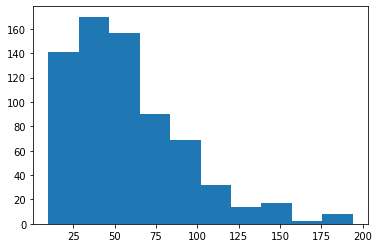

In [ ]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [ ]:
y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

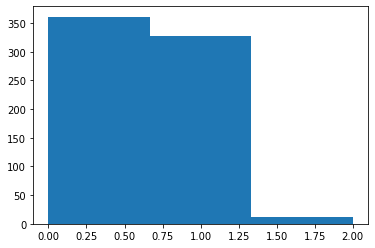

In [ ]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

Realizamos un drop de las columnas 'price' y 'thumbnail url' que no nos sirven para el modelo

In [ ]:
data.drop(['Price','Thumbnail Url'], axis=1, inplace=True)

rellenamos nan con el mean de la misma columna

In [ ]:
# Obtener la media de cada columna numérica
mean_values = data.select_dtypes(include=[np.number]).mean()

# Llenar los valores faltantes con la media
data.fillna(mean_values, inplace=True)


In [ ]:
data.notnull().mean().mul(100).sort_values(ascending=False)




Neighbourhood Group Cleansed    100.0
Zipcode                         100.0
Property Type                   100.0
Room Type                       100.0
Accommodates                    100.0
Bathrooms                       100.0
Bedrooms                        100.0
Beds                            100.0
Bed Type                        100.0
Guests Included                 100.0
Extra People                    100.0
Cancellation Policy             100.0
dtype: float64

#Iniciamos la normalizacion de datos separando variables numericas y categoricas

In [ ]:
#Division de col numericas y categoricas

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler



#Seleccion de columnas numericas
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

#Seleccion de columnas categoricas
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

#subconjunto de datos numericos
numeric_data = data[numeric_columns]

# Fill NaN values with column means
numeric_data = numeric_data.fillna(numeric_data.mean())

#normalizar grupo numerico
#Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

#Aplicar la normalización Min-Max al conjunto de datos numéricos
numeric_data_normalized = scaler.fit_transform(numeric_data)






In [ ]:
#one-hot para columnas categoricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categorical_data_encoded = encoder.fit_transform(data[categorical_columns])


##Combinar el conjunto de datos numéricos normalizados y el conjunto de datos categóricos codificados
import scipy.sparse as sp

#Convertir el conjunto de datos numéricos normalizados a un objeto scipy sparse
numeric_data_normalized_sparse = sp.csr_matrix(numeric_data_normalized)

#combinamos los datos numéricos normalizados y los datos categóricos codificados
data_normalized_encoded = sp.hstack([numeric_data_normalized_sparse, categorical_data_encoded])
numerical= numeric_data_normalized_sparse
categorical = categorical_data_encoded
dt_norm = data_normalized_encoded

print(categorical_data_encoded.shape)
numeric_data_normalized.shape


(700, 39)


(700, 7)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
dt_ready = dt_norm.toarray()
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(dt_ready)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())
# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(504, 46)
(140, 46)
(504,)
(140,)
(56, 46)
(56,)


#Modelo 1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model1 = Sequential()

model1.add(Dense(132, input_shape=(X_train.shape[1],), activation='sigmoid'))

model1.add(Dense(66, activation='sigmoid'))

model1.add(Dense(1, activation='linear'))

model1.compile(loss='mean_squared_error', optimizer='RMSProp')
model1.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=20,
          batch_size=4)
y_pred=model1.predict(X_test)

Epoch 1/20
126/126 [==============================] - 2s 4ms/step - loss: 0.0714 - val_loss: 0.0517
Epoch 2/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.0486
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0397
Epoch 4/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.0400
Epoch 5/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0391
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.0474
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.0396
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0401
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0406
Epoch 10/20
126/126 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0400

In [ ]:
loss = model1.evaluate(X_test, y_test)
print(f'Loss={loss}')


5/5 [==============================] - 0s 4ms/step - loss: 0.0174
Loss=0.01735464483499527


In [ ]:
y_reg_max= y_reg.max()
y_reg_min= y_reg.min()


y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
error_percent = error_denorm / y_test_denorm
error_percent = error_percent * 100
error_percent = error_percent.round(2)
print("Error medio:",error_denorm.mean())
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Error medio: 17.021672630310057
Real: 45.00 Predicho: 58.92. Error: 13.92
Real: 49.00 Predicho: 71.65. Error: 22.65
Real: 39.00 Predicho: 33.24. Error: 5.76
Real: 46.00 Predicho: 65.95. Error: 19.95
Real: 68.00 Predicho: 63.60. Error: 4.40
Real: 35.00 Predicho: 27.42. Error: 7.58
Real: 50.00 Predicho: 53.70. Error: 3.70
Real: 23.00 Predicho: 31.34. Error: 8.34
Real: 25.00 Predicho: 23.03. Error: 1.97
Real: 36.00 Predicho: 22.81. Error: 13.19
Real: 60.00 Predicho: 61.93. Error: 1.93
Real: 79.00 Predicho: 76.42. Error: 2.58
Real: 26.00 Predicho: 26.70. Error: 0.70
Real: 95.00 Predicho: 92.01. Error: 2.99
Real: 85.00 Predicho: 62.72. Error: 22.28
Real: 40.00 Predicho: 56.29. Error: 16.29
Real: 50.00 Predicho: 73.68. Error: 23.68
Real: 45.00 Predicho: 25.95. Error: 19.05
Real: 28.00 Predicho: 30.25. Error: 2.25
Real: 84.00 Predicho: 54.17. Error: 29.83
Real: 60.00 Predicho: 74.07. Error: 14.07
Real: 22.00 Predicho: 12.90. Error: 9.10
Real: 75.00 Predicho: 79.35. Error: 4.35
Real: 39.00 Pre

### Obtuvimos un error medio de 17 euros, la cual no esta nada mal por la cantidad de datos que tenemos y sus columnas.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


5/5 [==============================] - 0s 3ms/step
MAE: 0.093
RMSE: 0.132


# MODELO 2D IMAGENES

In [ ]:
x_img=images
x_img.shape

(700, 128, 128, 3)

# Redimensionamiento y normalización

In [ ]:
X_img_norm = x_img / 255.0
X_img_norm.shape

(700, 128, 128, 3)

In [ ]:
x_img.shape

(700, 128, 128, 3)

In [ ]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model2 = Model(inputs=model_base.input, outputs=gap)


     

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
images_feat = np.zeros((700, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model2.predict(x)
    images_feat[i] = features[0]


  0%|          | 0/700 [00:00<?, ?it/s]

1/1 [==============================] - 0s 201ms/step


  0%|          | 1/700 [00:00<02:56,  3.96it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 3/700 [00:00<01:31,  7.60it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 5/700 [00:00<01:17,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 7/700 [00:00<01:08, 10.11it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 9/700 [00:00<01:05, 10.47it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 11/700 [00:01<01:03, 10.81it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 13/700 [00:01<01:02, 10.91it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 15/700 [00:01<01:03, 10.76it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 17/700 [00:01<01:04, 10.59it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 19/700 [00:01<01:08,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 21/700 [00:02<01:00, 11.23it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 23/700 [00:02<00:53, 12.56it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 25/700 [00:02<00:50, 13.43it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 27/700 [00:02<00:48, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 29/700 [00:02<00:46, 14.34it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 31/700 [00:02<00:48, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 33/700 [00:02<00:46, 14.22it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 35/700 [00:02<00:45, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 37/700 [00:03<00:44, 14.88it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 39/700 [00:03<00:43, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 41/700 [00:03<00:42, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 43/700 [00:03<00:41, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 45/700 [00:03<00:41, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 47/700 [00:03<00:40, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 49/700 [00:03<00:40, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 51/700 [00:03<00:40, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 53/700 [00:04<00:39, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 55/700 [00:04<00:39, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 57/700 [00:04<00:38, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 59/700 [00:04<00:37, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 61/700 [00:04<00:38, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 63/700 [00:04<00:39, 16.10it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 65/700 [00:04<00:39, 16.02it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 67/700 [00:04<00:39, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 69/700 [00:05<00:39, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 71/700 [00:05<00:38, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 73/700 [00:05<00:39, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 75/700 [00:05<00:39, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 77/700 [00:05<00:37, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 79/700 [00:05<00:39, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 81/700 [00:05<00:39, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 83/700 [00:05<00:38, 15.90it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 85/700 [00:06<00:39, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 87/700 [00:06<00:38, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 89/700 [00:06<00:37, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 91/700 [00:06<00:38, 15.97it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 93/700 [00:06<00:36, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 95/700 [00:06<00:36, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 97/700 [00:06<00:36, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 99/700 [00:06<00:37, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 101/700 [00:07<00:37, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 103/700 [00:07<00:38, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 105/700 [00:07<00:37, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 107/700 [00:07<00:37, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 109/700 [00:07<00:37, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 111/700 [00:07<00:37, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 113/700 [00:07<00:37, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 115/700 [00:07<00:38, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 117/700 [00:08<00:39, 14.89it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 119/700 [00:08<00:38, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 121/700 [00:08<00:37, 15.34it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 123/700 [00:08<00:37, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 125/700 [00:08<00:36, 15.69it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 127/700 [00:08<00:36, 15.54it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 129/700 [00:08<00:36, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 131/700 [00:09<00:36, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 133/700 [00:09<00:36, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 135/700 [00:09<00:36, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 137/700 [00:09<00:35, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 139/700 [00:09<00:35, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 141/700 [00:09<00:34, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 143/700 [00:09<00:36, 15.45it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 145/700 [00:09<00:35, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 147/700 [00:10<00:35, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 149/700 [00:10<00:34, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 151/700 [00:10<00:33, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 153/700 [00:10<00:34, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 155/700 [00:10<00:35, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 157/700 [00:10<00:34, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 159/700 [00:10<00:33, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 161/700 [00:10<00:32, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 163/700 [00:11<00:34, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 165/700 [00:11<00:34, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 167/700 [00:11<00:33, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 169/700 [00:11<00:35, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 171/700 [00:11<00:34, 15.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 173/700 [00:11<00:34, 15.10it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 175/700 [00:11<00:33, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 177/700 [00:11<00:34, 15.30it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 179/700 [00:12<00:37, 13.76it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 181/700 [00:12<00:41, 12.61it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 183/700 [00:12<00:42, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 185/700 [00:12<00:43, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 187/700 [00:12<00:44, 11.48it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 189/700 [00:13<00:45, 11.35it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 191/700 [00:13<00:45, 11.30it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 193/700 [00:13<00:44, 11.43it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 195/700 [00:13<00:43, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 197/700 [00:13<00:43, 11.49it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 199/700 [00:13<00:44, 11.35it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 201/700 [00:14<00:44, 11.34it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 203/700 [00:14<00:44, 11.08it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 205/700 [00:14<00:44, 11.10it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 207/700 [00:14<00:45, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 209/700 [00:14<00:44, 10.96it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 211/700 [00:15<00:43, 11.18it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 213/700 [00:15<00:44, 11.01it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 215/700 [00:15<00:45, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 217/700 [00:15<00:44, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 219/700 [00:15<00:43, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 221/700 [00:15<00:39, 12.12it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 223/700 [00:15<00:36, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 225/700 [00:16<00:35, 13.39it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 227/700 [00:16<00:34, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 229/700 [00:16<00:32, 14.48it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 231/700 [00:16<00:32, 14.63it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 233/700 [00:16<00:31, 14.68it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 235/700 [00:16<00:31, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 237/700 [00:16<00:30, 15.30it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 239/700 [00:17<00:29, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 241/700 [00:17<00:29, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 243/700 [00:17<00:29, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 245/700 [00:17<00:30, 15.15it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 247/700 [00:17<00:28, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 249/700 [00:17<00:28, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 251/700 [00:17<00:29, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 253/700 [00:17<00:28, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 255/700 [00:18<00:28, 15.86it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 257/700 [00:18<00:27, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 259/700 [00:18<00:27, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 261/700 [00:18<00:28, 15.62it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 263/700 [00:18<00:27, 15.71it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 265/700 [00:18<00:28, 15.42it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 267/700 [00:18<00:27, 15.88it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 269/700 [00:18<00:27, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 271/700 [00:19<00:27, 15.66it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 273/700 [00:19<00:26, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 275/700 [00:19<00:26, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 277/700 [00:19<00:26, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 279/700 [00:19<00:27, 15.27it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 281/700 [00:19<00:27, 15.45it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 283/700 [00:19<00:26, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 285/700 [00:19<00:26, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 287/700 [00:20<00:26, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 289/700 [00:20<00:25, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 291/700 [00:20<00:26, 15.33it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 293/700 [00:20<00:26, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 295/700 [00:20<00:26, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 297/700 [00:20<00:26, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 299/700 [00:20<00:25, 15.42it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 301/700 [00:21<00:25, 15.42it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 303/700 [00:21<00:25, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 305/700 [00:21<00:25, 15.39it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 307/700 [00:21<00:25, 15.16it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 309/700 [00:21<00:25, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 311/700 [00:21<00:24, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 313/700 [00:21<00:25, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 315/700 [00:21<00:25, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 317/700 [00:22<00:24, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 319/700 [00:22<00:24, 15.70it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 321/700 [00:22<00:24, 15.74it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 323/700 [00:22<00:24, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 325/700 [00:22<00:24, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 327/700 [00:22<00:25, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 329/700 [00:22<00:24, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 331/700 [00:22<00:24, 14.86it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 333/700 [00:23<00:24, 14.89it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 335/700 [00:23<00:24, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 337/700 [00:23<00:23, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 339/700 [00:23<00:23, 15.65it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 341/700 [00:23<00:22, 15.61it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 343/700 [00:23<00:23, 15.46it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 345/700 [00:23<00:22, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 347/700 [00:23<00:22, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 349/700 [00:24<00:22, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 351/700 [00:24<00:22, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 353/700 [00:24<00:22, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 355/700 [00:24<00:22, 15.31it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 357/700 [00:24<00:22, 15.54it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 359/700 [00:24<00:22, 15.45it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 361/700 [00:24<00:21, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 363/700 [00:25<00:21, 16.05it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 365/700 [00:25<00:21, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 367/700 [00:25<00:22, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 369/700 [00:25<00:21, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 371/700 [00:25<00:20, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 373/700 [00:25<00:21, 15.53it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 375/700 [00:25<00:22, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 377/700 [00:26<00:24, 12.97it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 379/700 [00:26<00:25, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 381/700 [00:26<00:25, 12.44it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 383/700 [00:26<00:26, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 385/700 [00:26<00:27, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 387/700 [00:26<00:27, 11.30it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 389/700 [00:27<00:27, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 391/700 [00:27<00:26, 11.87it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 393/700 [00:27<00:27, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 395/700 [00:27<00:27, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 397/700 [00:27<00:26, 11.32it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 399/700 [00:27<00:26, 11.31it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 401/700 [00:28<00:27, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 403/700 [00:28<00:26, 11.11it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 405/700 [00:28<00:26, 11.12it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 407/700 [00:28<00:26, 11.09it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 409/700 [00:28<00:26, 11.16it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 411/700 [00:29<00:26, 10.89it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 413/700 [00:29<00:26, 10.77it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 415/700 [00:29<00:26, 10.74it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 417/700 [00:29<00:26, 10.72it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 419/700 [00:29<00:24, 11.27it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 421/700 [00:29<00:22, 12.48it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 423/700 [00:30<00:21, 13.04it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 425/700 [00:30<00:20, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 427/700 [00:30<00:19, 14.25it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 429/700 [00:30<00:19, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 431/700 [00:30<00:18, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 433/700 [00:30<00:18, 14.53it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 435/700 [00:30<00:17, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 437/700 [00:30<00:17, 14.67it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 439/700 [00:31<00:17, 14.99it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 441/700 [00:31<00:17, 15.09it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 443/700 [00:31<00:16, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 445/700 [00:31<00:16, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 447/700 [00:31<00:16, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 449/700 [00:31<00:16, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 451/700 [00:31<00:16, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 453/700 [00:32<00:16, 15.18it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 455/700 [00:32<00:16, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 457/700 [00:32<00:16, 14.76it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 459/700 [00:32<00:15, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 461/700 [00:32<00:15, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 463/700 [00:32<00:15, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▋   | 465/700 [00:32<00:15, 14.74it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 467/700 [00:32<00:15, 14.92it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 469/700 [00:33<00:15, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 471/700 [00:33<00:14, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 473/700 [00:33<00:15, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 475/700 [00:33<00:14, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 477/700 [00:33<00:14, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 479/700 [00:33<00:14, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 481/700 [00:33<00:14, 15.06it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 483/700 [00:34<00:14, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 485/700 [00:34<00:14, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 487/700 [00:34<00:13, 15.26it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 489/700 [00:34<00:14, 15.06it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 491/700 [00:34<00:13, 15.23it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 493/700 [00:34<00:13, 15.04it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 495/700 [00:34<00:13, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 497/700 [00:34<00:13, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 499/700 [00:35<00:13, 15.33it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 501/700 [00:35<00:12, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 503/700 [00:35<00:12, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 505/700 [00:35<00:12, 15.56it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 507/700 [00:35<00:12, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 509/700 [00:35<00:12, 15.11it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 511/700 [00:35<00:12, 15.15it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 513/700 [00:35<00:12, 15.38it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 515/700 [00:36<00:11, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 517/700 [00:36<00:11, 15.51it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 519/700 [00:36<00:11, 15.41it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 521/700 [00:36<00:11, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 523/700 [00:36<00:11, 15.08it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 525/700 [00:36<00:11, 14.67it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 527/700 [00:36<00:11, 15.09it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 529/700 [00:37<00:11, 14.72it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 531/700 [00:37<00:11, 14.96it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 533/700 [00:37<00:11, 14.96it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 535/700 [00:37<00:11, 14.48it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 537/700 [00:37<00:11, 14.51it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 539/700 [00:37<00:11, 14.59it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 541/700 [00:37<00:10, 14.64it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 543/700 [00:38<00:10, 14.64it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 545/700 [00:38<00:10, 14.30it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 547/700 [00:38<00:10, 14.43it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 549/700 [00:38<00:10, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 551/700 [00:38<00:10, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 553/700 [00:38<00:10, 13.63it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 555/700 [00:38<00:10, 14.04it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 557/700 [00:39<00:10, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 559/700 [00:39<00:09, 14.61it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 561/700 [00:39<00:09, 14.65it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 563/700 [00:39<00:09, 14.71it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 565/700 [00:39<00:08, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 567/700 [00:39<00:08, 15.46it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████▏ | 569/700 [00:39<00:09, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 571/700 [00:40<00:10, 12.74it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 573/700 [00:40<00:10, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 575/700 [00:40<00:10, 11.78it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 577/700 [00:40<00:10, 11.51it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 579/700 [00:40<00:10, 11.24it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 581/700 [00:40<00:11, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 583/700 [00:41<00:10, 10.73it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 585/700 [00:41<00:10, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 587/700 [00:41<00:10, 11.05it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 589/700 [00:41<00:10, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 591/700 [00:41<00:09, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 593/700 [00:42<00:09, 11.28it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 595/700 [00:42<00:09, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 597/700 [00:42<00:09, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 599/700 [00:42<00:09, 10.77it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 601/700 [00:42<00:09, 10.97it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 603/700 [00:42<00:08, 11.02it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 605/700 [00:43<00:08, 11.01it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 607/700 [00:43<00:08, 10.59it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 609/700 [00:43<00:08, 10.69it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 611/700 [00:43<00:08, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 613/700 [00:43<00:07, 11.62it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 615/700 [00:43<00:06, 12.63it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 617/700 [00:44<00:06, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 619/700 [00:44<00:05, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 621/700 [00:44<00:05, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 623/700 [00:44<00:05, 14.11it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 625/700 [00:44<00:05, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 627/700 [00:44<00:05, 14.47it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 629/700 [00:44<00:04, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 631/700 [00:45<00:04, 14.32it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 633/700 [00:45<00:04, 14.23it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 635/700 [00:45<00:04, 13.65it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 637/700 [00:45<00:04, 12.75it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 639/700 [00:45<00:04, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 641/700 [00:45<00:05, 11.72it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 643/700 [00:46<00:04, 12.08it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 645/700 [00:46<00:04, 11.72it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 647/700 [00:46<00:04, 11.09it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 649/700 [00:46<00:05, 10.05it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 651/700 [00:47<00:05,  8.42it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 652/700 [00:47<00:06,  7.48it/s]

1/1 [==============================] - 0s 105ms/step


 93%|█████████▎| 653/700 [00:47<00:07,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 654/700 [00:47<00:06,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 655/700 [00:47<00:06,  6.94it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 656/700 [00:47<00:06,  7.14it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▍| 657/700 [00:48<00:07,  5.88it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 658/700 [00:48<00:08,  4.86it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 659/700 [00:48<00:08,  4.71it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 660/700 [00:48<00:07,  5.35it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 661/700 [00:48<00:06,  6.09it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 662/700 [00:48<00:05,  6.70it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 663/700 [00:49<00:05,  7.02it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████▍| 664/700 [00:49<00:06,  5.93it/s]

1/1 [==============================] - 0s 159ms/step


 95%|█████████▌| 665/700 [00:49<00:07,  4.48it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 666/700 [00:49<00:07,  4.78it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 667/700 [00:49<00:05,  5.56it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 669/700 [00:50<00:04,  7.68it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 671/700 [00:50<00:03,  9.41it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 673/700 [00:50<00:02, 10.79it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 675/700 [00:50<00:02, 11.81it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 677/700 [00:50<00:01, 12.73it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 679/700 [00:50<00:01, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 681/700 [00:50<00:01, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 683/700 [00:51<00:01, 13.67it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 685/700 [00:51<00:01, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 687/700 [00:51<00:00, 14.06it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 689/700 [00:51<00:00, 13.92it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 691/700 [00:51<00:00, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 693/700 [00:51<00:00, 14.28it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 695/700 [00:51<00:00, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 697/700 [00:52<00:00, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 699/700 [00:52<00:00, 14.74it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████| 700/700 [00:52<00:00, 13.39it/s]


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
dt_ready = dt_norm.toarray()
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())
# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(504, 512)
(140, 512)
(504,)
(140,)
(56, 512)
(56,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model3 = Sequential()

# Capa de convolución 2D con 128 filtros, tamaño de kernel 3x3, activación 'relu' y tamaño de entrada de imagen de 128x128x3
model3.add(Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Capa de max pooling 2D con tamaño de ventana 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de convolución 2D con 128 filtros, tamaño de kernel 3x3 y activación 'relu'
model3.add(Conv2D(128, (3, 3), activation='relu'))

# Capa de max pooling 2D con tamaño de ventana 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Capa para aplanar la imagen en una sola dimensión
model3.add(Flatten())

# Capa densa con 64 neuronas y activación 'relu'
model3.add(Dense(64, activation='relu'))

# Capa de salida con una sola neurona y activación 'linear' para regresión de imágenes
model3.add(Dense(1, activation='linear'))

model3.compile(optimizer='adam', loss='mse')
model3.fit(X_train, y_train, epochs=15, batch_size=4, validation_data=(X_val, y_val))

Epoch 1/15


ValueError: ignored

In [ ]:
ypre=model.predict(X_test)

In [ ]:
y_reg_max= y_reg.max()
y_reg_min= y_reg.min()


y_pred_denorm1 = ypre[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm1 = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm1 = np.abs(y_pred_denorm1 - y_test_denorm1)
error_percent1 = error_denorm1 / y_test_denorm1
error_percent1 = error_percent1 * 100
error_percent1 = error_percent1.round(2)
print("Error medio:",error_denorm1.mean())
for gt, pred, e in zip(y_test_denorm1, y_pred_denorm1, error_denorm1):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

#MODELO HIBRIDO


In [ ]:
print(dt_norm.shape)
images_feat.shape

(700, 46)


(700, 512)

In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
df_final = np.concatenate((dt_ready, images_feat), axis=1)
print(df_final.shape)

(700, 558)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(df_final)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(df_final)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())
# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(504, 558)
(140, 558)
(504,)
(140,)
(56, 558)
(56,)


In [ ]:
from keras.layers import Input, Dense, Concatenate, Dropout
from keras.models import Model

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Creamos el modelo

model.compile(loss='mse', optimizer='RMSProp')


In [ ]:
print(X_train.shape)

y_train.shape

(504, 558)


(504,)

In [ ]:
# Entrenamos el modelo
model.fit(X_train, y_train, epochs=40, batch_size=20, validation_data=(X_val, y_val))


Epoch 1/40
26/26 [==============================] - 1s 10ms/step - loss: 0.0321 - val_loss: 0.0451
Epoch 2/40
26/26 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0434
Epoch 3/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.0447
Epoch 4/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0126 - val_loss: 0.0479
Epoch 5/40
26/26 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0423
Epoch 6/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0392
Epoch 7/40
26/26 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0464
Epoch 8/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.0429
Epoch 9/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0410
Epoch 10/40
26/26 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0441
Epoch 11/40
26/26 

In [ ]:
loss = model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)
print(f'Loss={loss}')

5/5 [==============================] - 0s 2ms/step
Loss=0.019059212878346443


In [ ]:
y_reg_max= y_reg.max()
y_reg_min= y_reg.min()


y_pred_denorm1 = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm1 = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm1 = np.abs(y_pred_denorm1 - y_test_denorm1)
error_percent1 = error_denorm1 / y_test_denorm1
error_percent1 = error_percent1 * 100
error_percent1 = error_percent1.round(2)
print("Error medio:",error_denorm1.mean())
for gt, pred, e in zip(y_test_denorm1, y_pred_denorm1, error_denorm1):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Error medio: 17.893294613701958
Real: 45.00 Predicho: 46.66. Error: 1.66
Real: 49.00 Predicho: 35.58. Error: 13.42
Real: 39.00 Predicho: 25.11. Error: 13.89
Real: 46.00 Predicho: 69.93. Error: 23.93
Real: 68.00 Predicho: 63.37. Error: 4.63
Real: 35.00 Predicho: 31.15. Error: 3.85
Real: 50.00 Predicho: 46.92. Error: 3.08
Real: 23.00 Predicho: 43.28. Error: 20.28
Real: 25.00 Predicho: 19.79. Error: 5.21
Real: 36.00 Predicho: 40.40. Error: 4.40
Real: 60.00 Predicho: 73.30. Error: 13.30
Real: 79.00 Predicho: 89.44. Error: 10.44
Real: 26.00 Predicho: 55.33. Error: 29.33
Real: 95.00 Predicho: 63.12. Error: 31.88
Real: 85.00 Predicho: 63.38. Error: 21.62
Real: 40.00 Predicho: 58.95. Error: 18.95
Real: 50.00 Predicho: 72.21. Error: 22.21
Real: 45.00 Predicho: 34.44. Error: 10.56
Real: 28.00 Predicho: 21.87. Error: 6.13
Real: 84.00 Predicho: 67.88. Error: 16.12
Real: 60.00 Predicho: 56.69. Error: 3.31
Real: 22.00 Predicho: 20.67. Error: 1.33
Real: 75.00 Predicho: 85.90. Error: 10.90
Real: 39.00

###Los resultados del modelo hibrido son casi aceptables visto que en algunos casos llega ser muy cercano al valor real pero en otros casos se va muy lejos. con una mejor dedicacion a la limpieza de dataset, mas datos disponibles  y una mejor arquitectura considero que se podria mejorar mucho este modelo.